In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import glob, os, re
import herald_visualization.echem as ec
from herald_visualization.mpr2csv import cycle_mpr2csv, id_to_path
from herald_visualization.plot import plot_cycle, plot_gitt, plot_multi_cell, multi_cell_dqdv_plot, parse_cycle_csv

In [2]:
default_params = {
              'font.family': 'Helvetica',
              'axes.labelsize': 20,
              'axes.labelweight': 'bold',  # Make axes labels bold
              'xtick.labelsize': 18,
              'ytick.labelsize': 18,
              'xtick.major.size': 7,
              'ytick.major.size': 7,
              'xtick.major.width': 2.0,
              'ytick.major.width': 2.0,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'font.size': 24,
              'axes.linewidth': 2.0,
              'lines.dashed_pattern': (5, 2.5),
              'lines.markersize': 10,
              'lines.linewidth': 3,
              'lines.markeredgewidth': 1,
              'lines.markeredgecolor': 'k',
              'legend.fontsize': 16,  # Adjust the font size of the legend
              'legend.title_fontsize': 24,  # Increase legend title size if needed
              'legend.frameon': True
    }
plt.rcParams.update(default_params)

In [3]:
os.getcwd()

'/Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/herald_visualization/notebooks'

In [4]:
cells_df = pd.read_csv('../../PROPEL-1K/In-house cells and syntheses - Coin Cells.csv', index_col='Identifier')

In [5]:
def summarize_fom(cell_df, id):
    try:
        df, df_sum, df_for_dqdv = parse_cycle_csv(os.path.join(id_to_path(id),'outputs'))
    except (IndexError, FileNotFoundError) as error:
        cycle_mpr2csv(id_to_path(id))
        df, df_sum, df_for_dqdv = parse_cycle_csv(os.path.join(id_to_path(id),'outputs'))       

    final_cycle = df['full cycle'].iloc[-1]
    resting_at_end = 1 if df['state'].iloc[-1] == 'R' else 0 # Rest as final data point suggests completion of the final cycle
    # This helps to prevent analysis of half finished cycles

    cha_mask = df['state'].astype(str) == '0'
    dis_mask = df['state'].astype(str) == '1'
    rest_mask = df['state'] == 'R'

    # Summary can only be calculated if at least the 0th cycle is complete
    # This is true if final_cycle is 0 and the test ends in a rest
    # or if final_cycle is > 0
    if (final_cycle + resting_at_end) > 0:
        cell_df.loc[id, 'Specific discharge energy 0'] = df_sum.loc[0, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Max specific discharge energy'] = df_sum['Specific Discharge Energy Total AM'].max()
        cell_df.loc[id, 'Specific discharge capacity 0'] = df_sum.loc[0, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Max specific discharge capacity'] = df_sum['Specific Discharge Capacity Total AM'].max()
        cell_df.loc[id, 'Discharge overpotential 0'] = df[(df['half cycle'] == 1) & rest_mask]['Voltage'].max() - df[(df['half cycle'] == 1) & dis_mask]['Voltage'].min()

    if (final_cycle + resting_at_end) > 1:
        cell_df.loc[id, 'Specific discharge energy 1'] = df_sum.loc[1, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Discharge energy retention 0,1'] = df_sum.loc[1, 'Specific Discharge Energy Total AM']/df_sum.loc[0, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Specific discharge capacity 1'] = df_sum.loc[1, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Discharge capacity retention 0,1'] = df_sum.loc[1, 'Specific Discharge Capacity Total AM']/df_sum.loc[0, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Charge overpotential 1'] = df[(df['half cycle'] == 2) & cha_mask]['Voltage'].max() - df[(df['half cycle'] == 2) & rest_mask]['Voltage'].min()
    
    if (final_cycle + resting_at_end) > 5:
        cell_df.loc[id, 'Average discharge energy retention 0,5'] = (df_sum.loc[5, 'Specific Discharge Energy Total AM']/df_sum.loc[0, 'Specific Discharge Energy Total AM'])**0.2
        cell_df.loc[id, 'Average discharge capacity retention 0,5'] = (df_sum.loc[5, 'Specific Discharge Capacity Total AM']/df_sum.loc[0, 'Specific Discharge Capacity Total AM'])**0.2

    return cell_df

In [6]:
# Summary figures of merit for cells that have performed 'Cycling' tests
cycling_mask = cells_df['Test Type'] == 'Cycling'
ignore_ids = ['053I', '067A', '067B', '056C', '056D'] # Ignore cell IDs that are known to cause glitches or had problems during testing

for id in cells_df[cycling_mask].index:
    if id not in ignore_ids:
        print(f"Summarizing CC{id}")
        cells_df = summarize_fom(cells_df, id)
    else:
        print(f"Ignoring CC{id}")

Summarizing CC052A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC052E


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC052F
Summarizing CC053A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC053E


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC053G


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Ignoring CC053I
Summarizing CC054A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC054B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC055A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC055C


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Ignoring CC056C
Ignoring CC056D
Summarizing CC056E


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC056F


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC057C
Summarizing CC057D
Summarizing CC057E


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC058A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC058B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC058C


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC059A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC059B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC059C
Summarizing CC060A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC060D


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC061A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC061C


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC062A
Summarizing CC062B
Summarizing CC063A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC064A
Summarizing CC064B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC065A


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC065B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


Summarizing CC066A
Summarizing CC066B
Ignoring CC067A
Ignoring CC067B


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


['../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC057A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:155: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file))


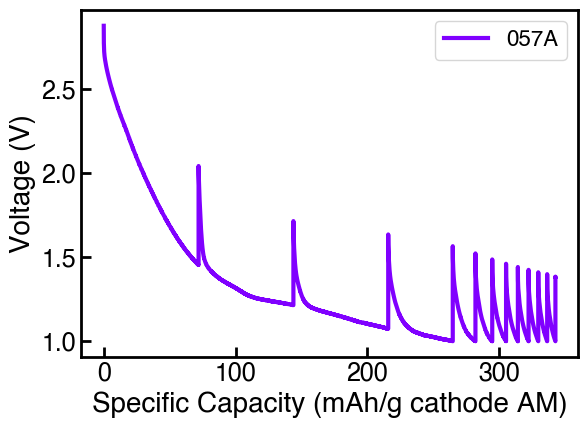

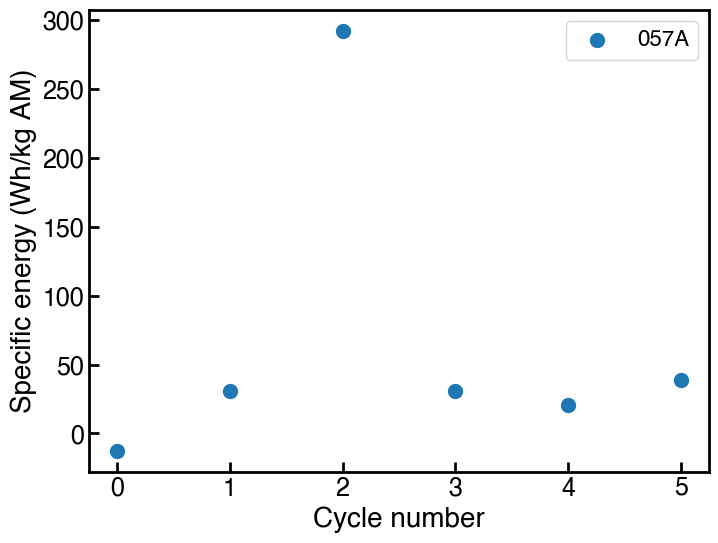

In [ ]:
# Overlay multiple cycling curves

cell_ids = ['055B']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)
cycle = 0 # Cycle # to plot
plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist()) # Use fill_value to adjust cycle #
plt.legend(cell_ids)
plt.show()

plt.figure(figsize=[8,6])
for id in cell_ids:
    df_sum = pd.read_csv(os.path.join(id_to_path(id), 'outputs', 'cycle_summary.csv'))
    plt.scatter(df_sum['full cycle'], df_sum['Specific Discharge Energy Total AM'], label=id)
# plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy (Wh/kg AM)')\
# plt.ylim(bottom=0)
plt.legend()
plt.show()

In [30]:
print(cells_df.loc[['055A','055C']][['Specific discharge energy 0', 'Discharge energy retention 0,1']])

            Specific discharge energy 0  Discharge energy retention 0,1
Identifier                                                             
055A                         643.237288                        0.925990
055C                         693.916357                        0.792343


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


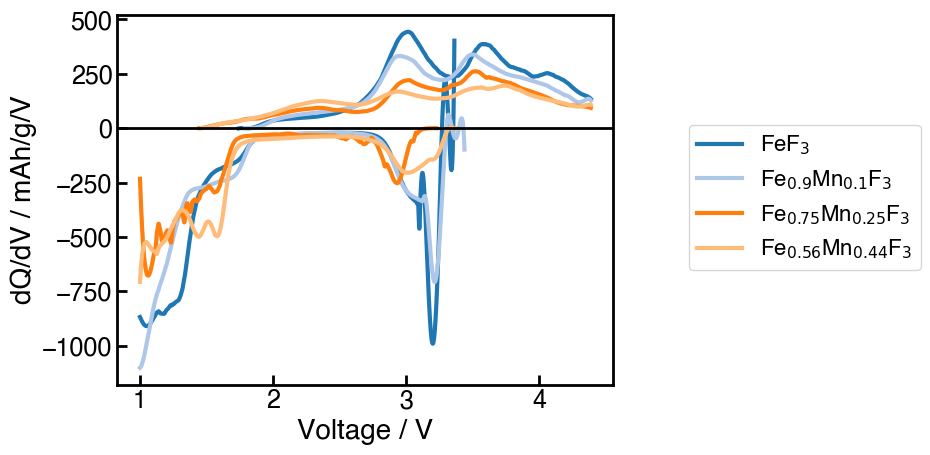

In [8]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC063A','CC053G','CC055A']
labels = ['FeF$_3$','Fe$_{0.9}$Mn$_{0.1}$F$_3$','Fe$_{0.75}$Mn$_{0.25}$F$_3$','Fe$_{0.56}$Mn$_{0.44}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)
    dfs[id] = df_for_dqdv

fig, ax = multi_cell_dqdv_plot(list(dfs.values()),
                            colormap='tab20',
                            halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                            # cycle=1, # Uncomment to show 1st charge and discharge
                            capacity_label='Specific Capacity', 
                            labels=labels)
# plt.ylim(bottom=-2000)
# cm = ax.get_cmap()
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


(-2000.0, 719.6143232547429)

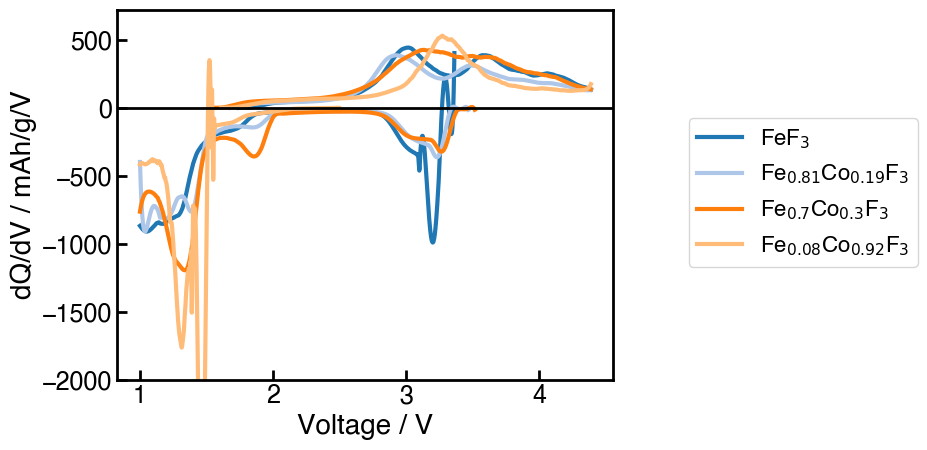

In [14]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC052E','CC065B','CC054B']
labels = ['FeF$_3$','Fe$_{0.81}$Co$_{0.19}$F$_3$','Fe$_{0.7}$Co$_{0.3}$F$_3$','Fe$_{0.08}$Co$_{0.92}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)
    dfs[id] = df_for_dqdv

fig, ax = multi_cell_dqdv_plot(list(dfs.values()),
                            colormap='tab20',
                            halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                            # cycle=1, # Uncomment to show 1st charge and discharge
                            capacity_label='Specific Capacity', 
                            labels=labels)
plt.ylim(bottom=-2000)
# cm = ax.get_cmap()
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


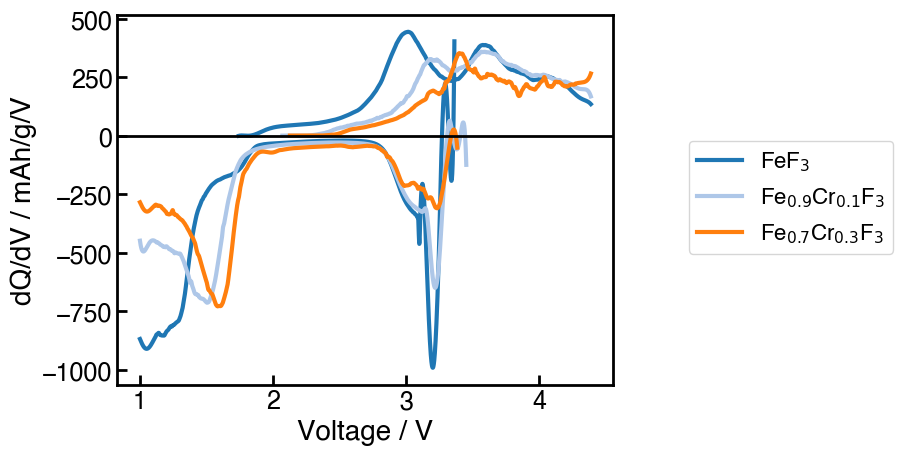

In [12]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC060A','CC061A']
labels = ['FeF$_3$','Fe$_{0.9}$Cr$_{0.1}$F$_3$','Fe$_{0.7}$Cr$_{0.3}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)
    dfs[id] = df_for_dqdv

fig, ax = multi_cell_dqdv_plot(list(dfs.values()),
                            colormap='tab20',
                            halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                            # cycle=1, # Uncomment to show 1st charge and discharge
                            capacity_label='Specific Capacity', 
                            labels=labels)
# plt.ylim(bottom=-2000)
# cm = ax.get_cmap()
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

In [3]:
cycle_mpr2csv(id_to_path('CC057B'))

Running in /Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h
Imported using stitch.txt.
Data file(s): ['241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h_02_GCPL_C12.mpr', '241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h_05_GCPL_C12.mpr']
Settings file: 241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h.mps
Cell properties: {'active_material_mass': 5.08, 'x_at_mass': 0.0, 'empty_mol_weight': 111.93, 'interc_weight': 6.94, 'x_at_start': 0.0, 'e_per_ion': 3.0, 'surface_area': 2.0}
CSV exported to: outputs/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h.csv
Cycle summary CSV exported to: outputs/cycle_summary.csv


,flags,Ns,time/s,dQ/mA.h,(Q-Qo)/mA.h,control/V/mA,Voltage,I Range,Q charge/discharge/mA.h,half cycle,...,Power,Specific Capacity,Specific Current,Specific Power,Specific Capacity Total AM,Specific Current Total AM,Specific Power Total AM,Areal Capacity,Areal Current,Areal Power
0,19,0,5.963304e+02,0.0,0.000000,0.0,2.855492,14,0.000000,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,19,0,5.973304e+02,0.0,0.000000,0.0,2.854243,14,0.000000,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,19,0,5.983304e+02,0.0,0.000000,0.0,2.854224,14,0.000000,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,19,0,5.993304e+02,0.0,0.000000,0.0,2.854262,14,0.000000,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,19,0,6.003304e+02,0.0,0.000000,0.0,2.854243,14,0.000000,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418155,19,1,2.574993e+06,0.0,-0.008579,0.0,3.128983,14,-2.969355,15,...,0.0,584.518698,0.0,0.0,492.845031,0.0,0.0,1.484677,0.0,0.0
2418156,19,1,2.574994e+06,0.0,-0.008579,0.0,3.128944,14,-2.969355,15,...,0.0,584.518698,0.0,0.0,492.845031,0.0,0.0,1.484677,0.0,0.0
2418157,19,1,2.574995e+06,0.0,-0.008579,0.0,3.129021,14,-2.969355,15,...,0.0,584.518698,0.0,0.0,492.845031,0.0,0.0,1.484677,0.0,0.0
2418158,19,1,2.574996e+06,0.0,-0.008579,0.0,3.129021,14,-2.969355,15,...,0.0,584.518698,0.0,0.0,492.845031,0.0,0.0,1.484677,0.0,0.0


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.07891984
['../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/cycle_summary.csv', '../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:102: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Specific Capacity (mAh/g)-Cathode AM', ylabel='Voltage vs Li/Li+ (V)'>)

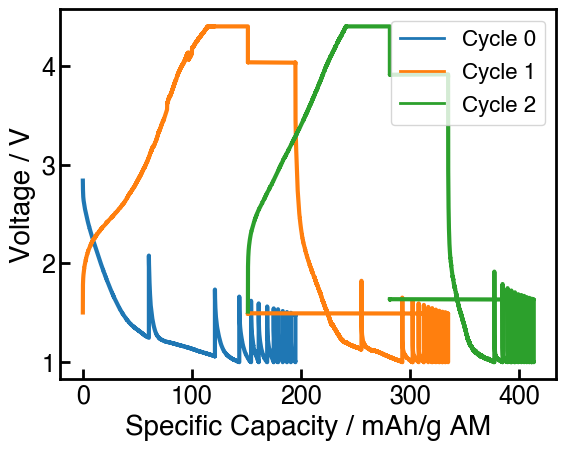

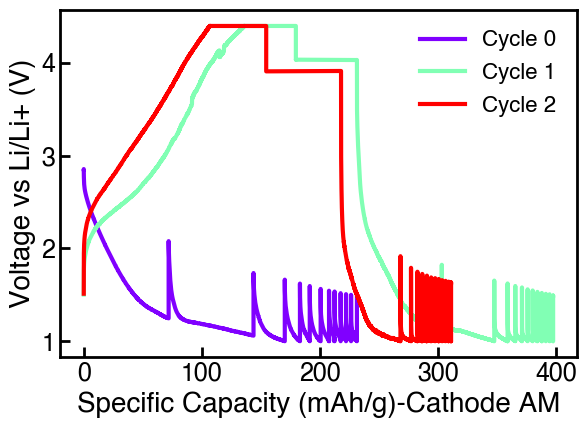

In [4]:
dir_name = os.path.join(id_to_path('CC057B'), 'outputs')
df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'].astype(str) == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

# cc056e_full_cap = df_sum['Specific Discharge Capacity Total AM']
# cc056e_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2], norm='full_mass')
plot_cycle(dir_name, full_cycles=[0,1,2])
# ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2,5], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)


['../../PROPEL-1K/Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/241206-CC053G-C20-1V-4p5V_CV/outputs/241206-CC053G-C20-1V-4p5V_CV.csv', '../../PROPEL-1K/Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/241206-CC053G-C20-1V-4p5V_CV/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_15245/553507286.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


0.41812364


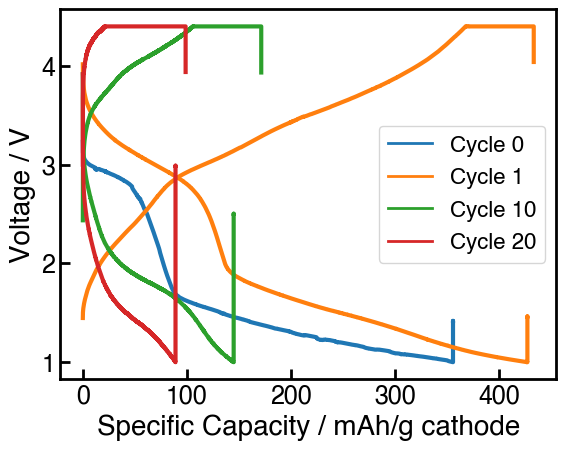

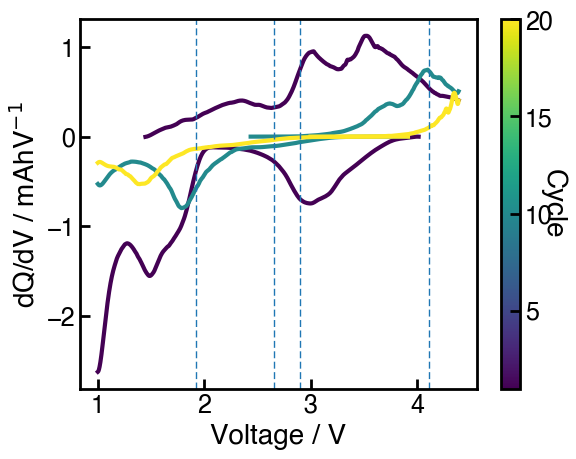

In [43]:
dir_name = os.path.join(id_to_path('CC053G'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Mn25 = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn25_cha = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc053g_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc053g_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='mass')
ec.multi_dqdv_plot(df_no_CV_Mn25, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p75Mn0p25(LiF)3-25CB-C1-CCPP/250113-CC059A-C20-4p4V_CV-1V/outputs/250113-CC059A-C20-4p4V_CV-1V.csv', '../../PROPEL-1K/Li-Fe0p75Mn0p25(LiF)3-25CB-C1-CCPP/250113-CC059A-C20-4p4V_CV-1V/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_15245/398986954.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


nan


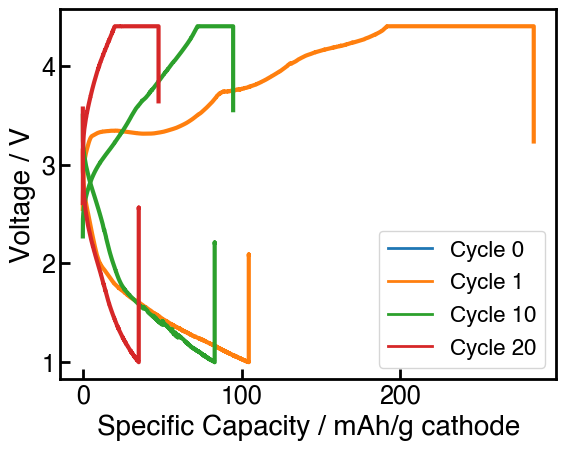

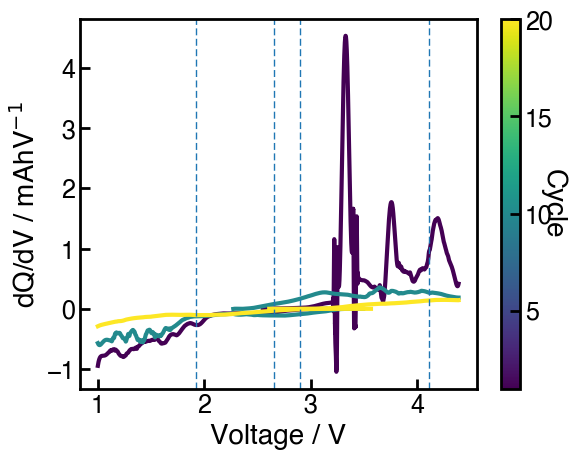

In [54]:
dir_name = os.path.join(id_to_path('CC059A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn25_disch = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc053g_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc053g_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='mass')
ec.multi_dqdv_plot(df_no_CV, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/241206-CC055A-C20-1V-4p4V_CV.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/cycle_summary.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/241206-CC055A-C20-1V-4p4V_CV_01_PEIS_C14.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_15245/111068332.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


0.44473476


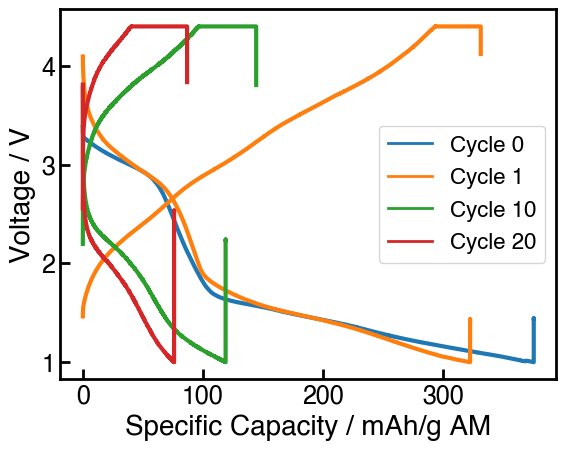

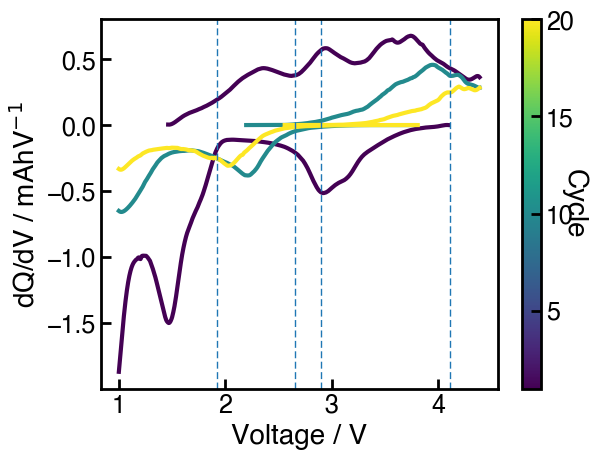

In [38]:
dir_name = os.path.join(id_to_path('CC055A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Mn44 = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn44_cha = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc055a_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc055a_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Mn44, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p56Mn0p44(LiF)3-25CB-C1-CCPP/250113-CC058A-C20-4p4V_CV-1V/outputs/250113-CC058A-C20-4p4V_CV-1V.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44(LiF)3-25CB-C1-CCPP/250113-CC058A-C20-4p4V_CV-1V/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_15245/2278996428.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


nan


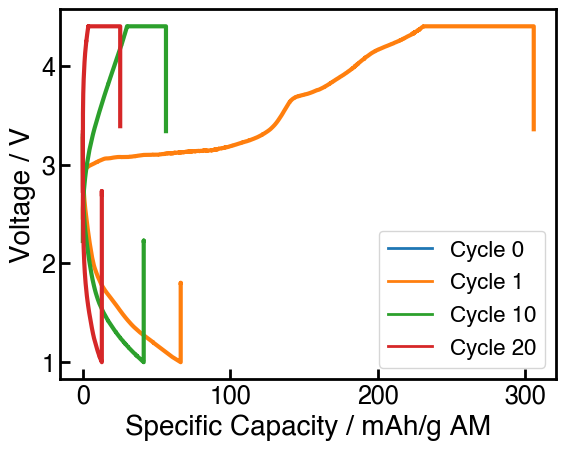

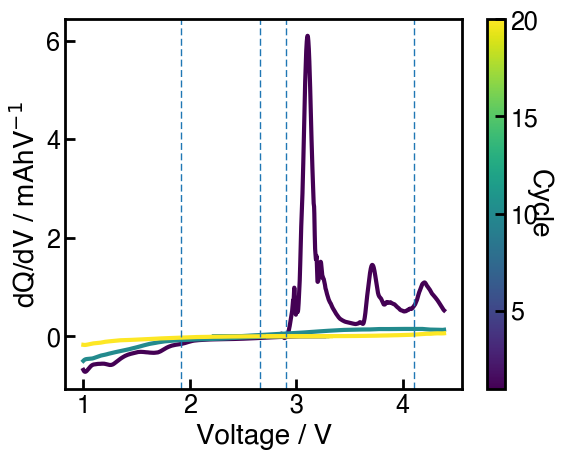

In [53]:
dir_name = os.path.join(id_to_path('CC058A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn44_disch = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc055a_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc055a_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

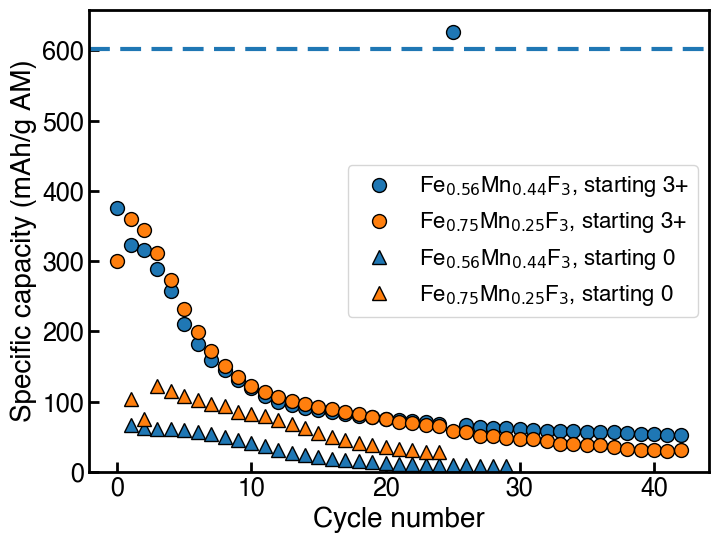

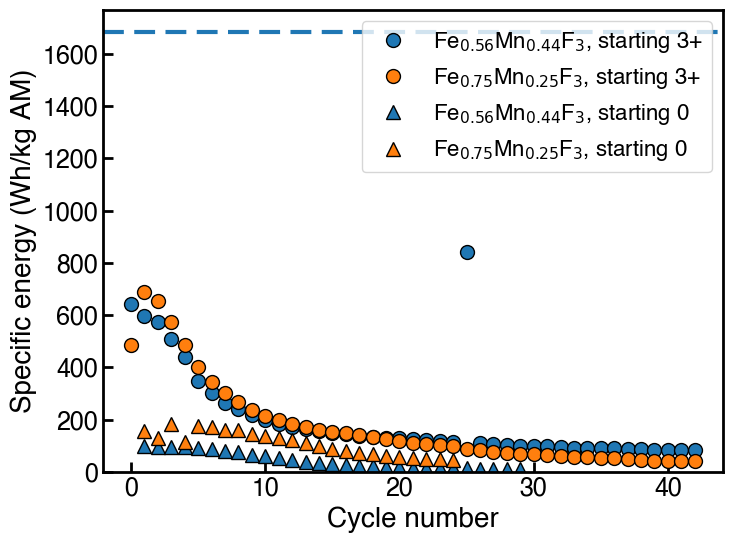

In [52]:
cmap = plt.get_cmap('tab10')

plt.figure(figsize=[8,6])
plt.plot(df_sum_Mn44_cha['Specific Discharge Capacity Total AM'], 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 3+', color=cmap(0))
plt.plot(df_sum_Mn25_cha['Specific Discharge Capacity Total AM'], 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 3+', color=cmap(1))
plt.plot(df_sum_Mn44_disch['Specific Discharge Capacity Total AM'], '^', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 0', color=cmap(0))
plt.plot(df_sum_Mn25_disch['Specific Discharge Capacity Total AM'], '^', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 0', color=cmap(1))
plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific capacity (mAh/g AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.plot(df_sum_Mn44_cha['Specific Discharge Energy Total AM'], 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 3+', color=cmap(0))
plt.plot(df_sum_Mn25_cha['Specific Discharge Energy Total AM'], 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 3+', color=cmap(1))
plt.plot(df_sum_Mn44_disch['Specific Discharge Energy Total AM'], '^', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 0', color=cmap(0))
plt.plot(df_sum_Mn25_disch['Specific Discharge Energy Total AM'], '^', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 0', color=cmap(1))
plt.axhline(1684, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy (Wh/kg AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:346: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


0.6695339599999999


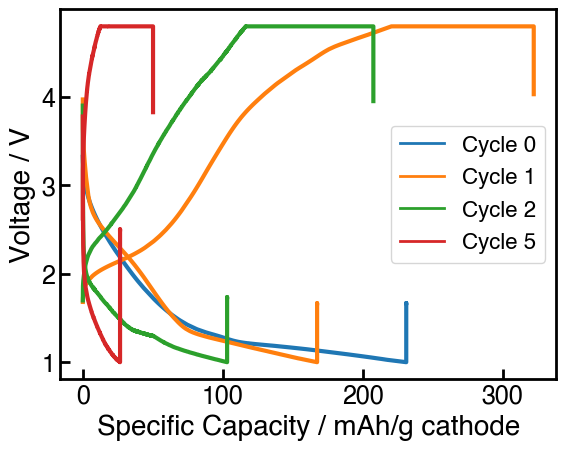

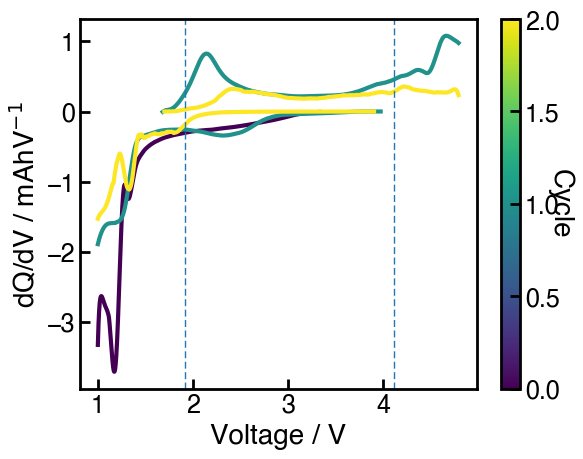

In [16]:
dir_name = os.path.join(id_to_path('CC057E'), 'outputs')
df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc057e_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc057e_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='mass')
ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2], polynomial_spline=1)
for x in [1.92, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057C-C20-1V-4p4V_CV/outputs/241217-CC057C-C20-1V-4p4V_CV.csv', '../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057C-C20-1V-4p4V_CV/outputs/cycle_summary.csv']
0.6729305699999999


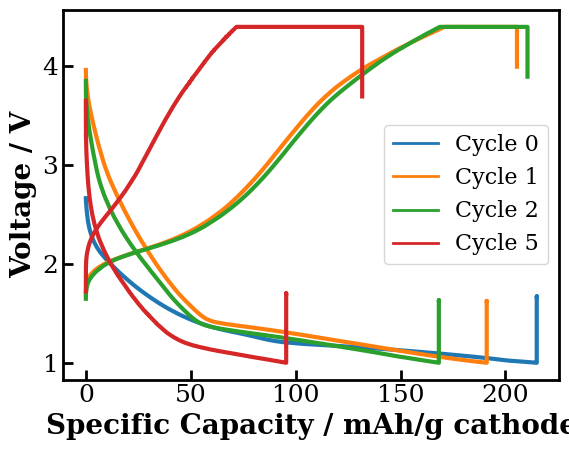

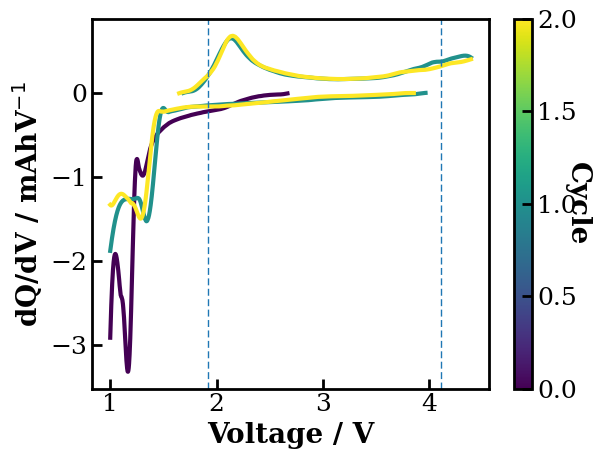

In [34]:
dir_name = os.path.join(id_to_path('CC057C'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Mn100 = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc057c_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc057c_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='mass')
ec.multi_dqdv_plot(df_no_CV_Mn100, cycles=[0,1,2], polynomial_spline=1)
for x in [1.92, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

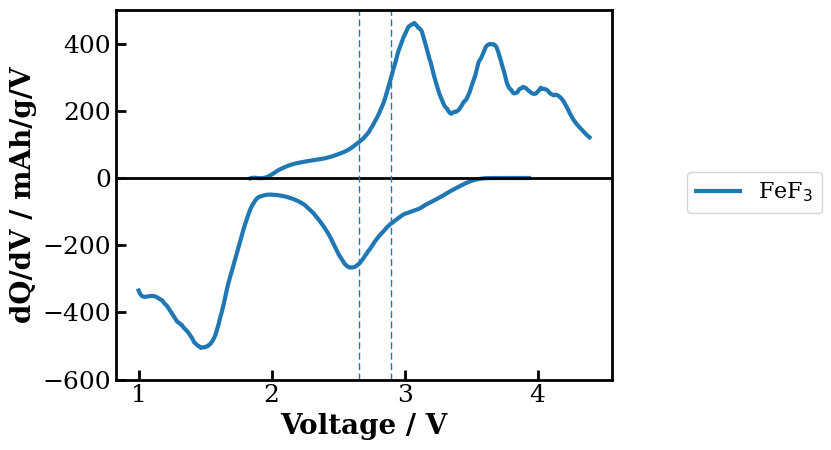

In [12]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$'])
plt.ylim(-600, 500)
for x in [2.66, 2.90]:
    plt.axvline(x, linestyle='--', linewidth=1)

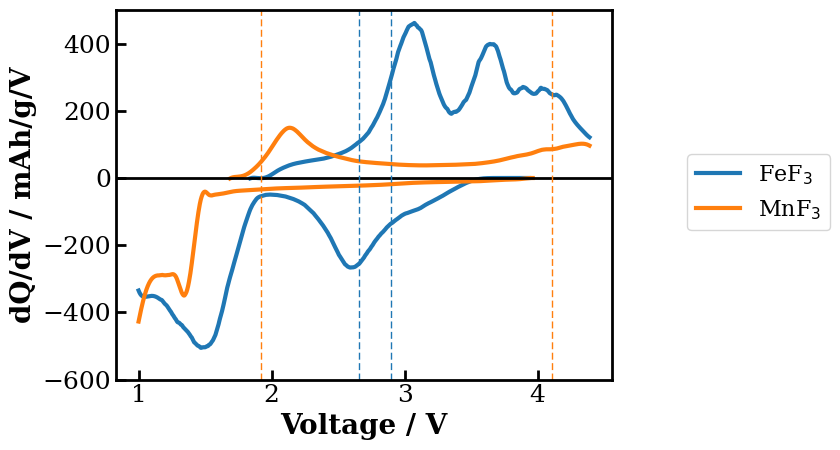

In [13]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$'])
plt.ylim(-600, 500)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

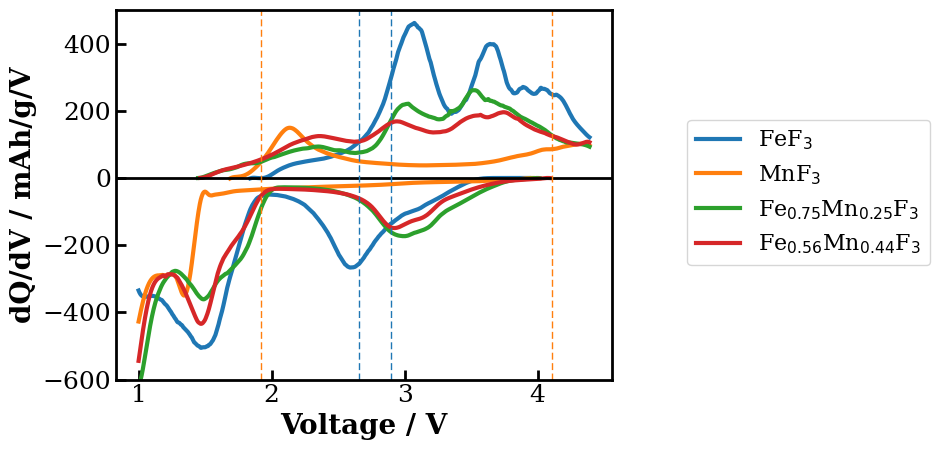

In [14]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100, df_no_CV_Mn25, df_no_CV_Mn44],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$', 'Fe$_{0.56}$Mn$_{0.44}$F$_3$'])
plt.ylim(-600, 500)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

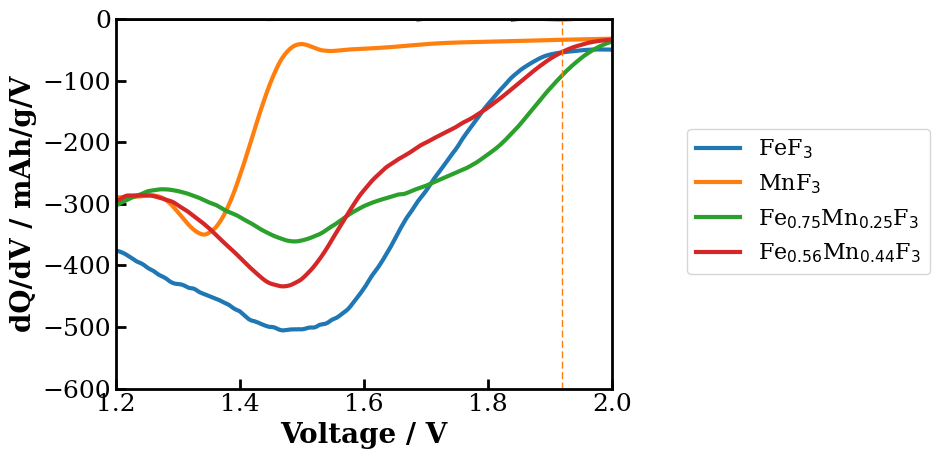

In [15]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100, df_no_CV_Mn25, df_no_CV_Mn44],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$', 'Fe$_{0.56}$Mn$_{0.44}$F$_3$'])
plt.ylim(-600, 0)
plt.xlim(1.2, 2)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

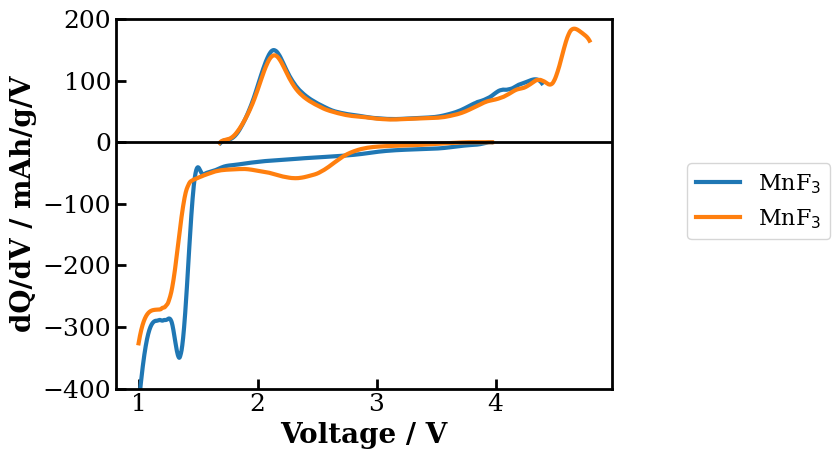

In [38]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn100, df_no_CV_Mn100_highV],
                             cycle=1,
                             capacity_label='Specific Capacity', 
                             labels=['MnF$_3$', 'MnF$_3$'])
plt.ylim(-400, 200)
cm = plt.get_cmap('tab10')
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

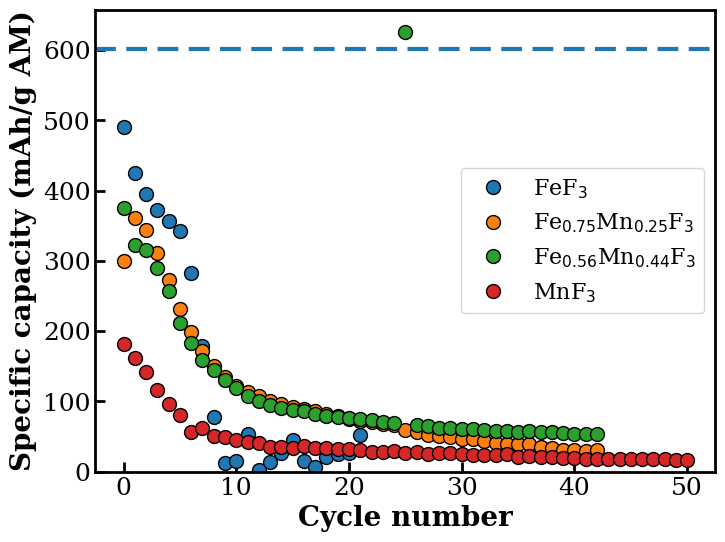

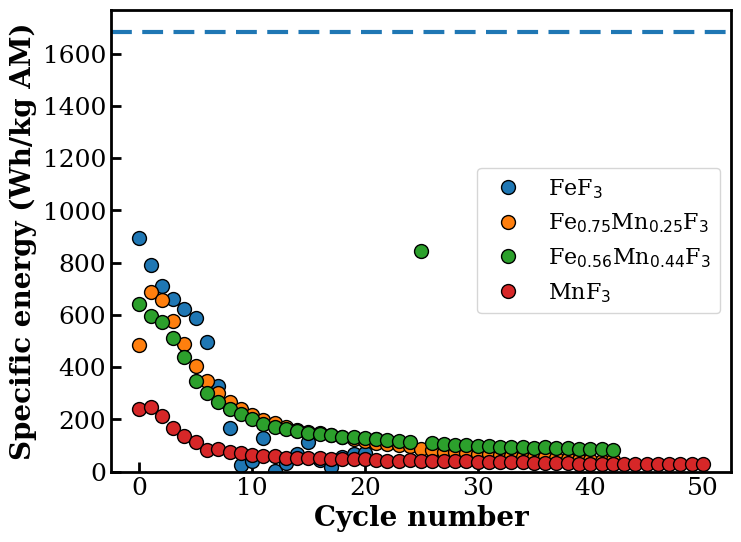

In [109]:
plt.figure(figsize=[8,6])
plt.plot(cc056e_full_cap, 'o', label='FeF$_3$')
plt.plot(cc053g_full_cap, 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$')
plt.plot(cc055a_full_cap, 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$')
plt.plot(cc057c_full_cap, 'o', label='MnF$_3$')
plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific capacity (mAh/g AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.plot(cc056e_energy, 'o', label='FeF$_3$')
plt.plot(cc053g_energy, 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$')
plt.plot(cc055a_energy, 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$')
plt.plot(cc057c_energy, 'o', label='MnF$_3$')
plt.axhline(1684, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy (Wh/kg AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

['../../../PROPEL-1K/Li-Fe0p08Co0p92F3-25CB-C1-CCPP/241206-CC054A-C20-1V-4p4V_CV/outputs/241206-CC054A-C20-1V-4p4V_CV.csv', '../../../PROPEL-1K/Li-Fe0p08Co0p92F3-25CB-C1-CCPP/241206-CC054A-C20-1V-4p4V_CV/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_54318/1136705008.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.03892915


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

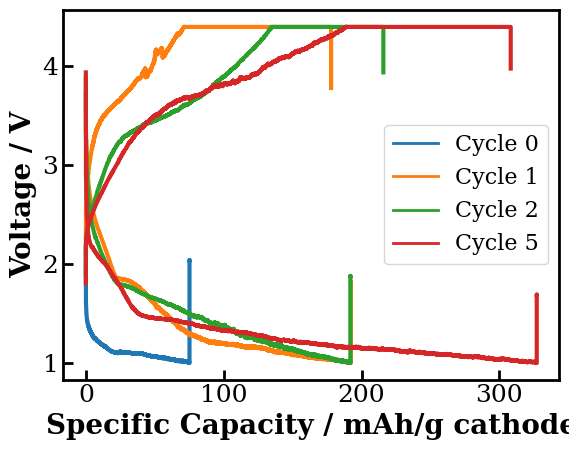

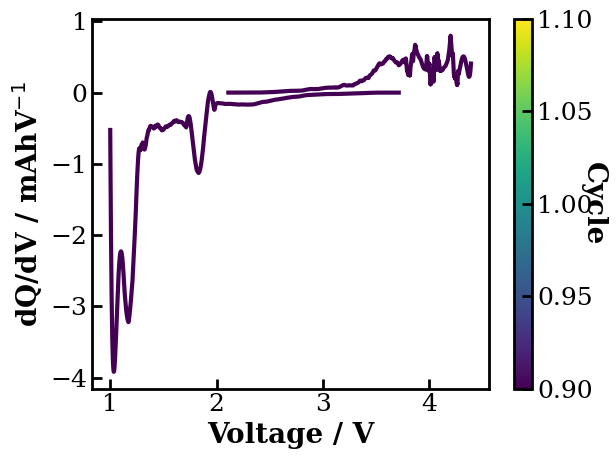

In [85]:
dir_name = os.path.join(id_to_path('CC054A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Fe8Co92 = df_no_ocv[df_no_ocv['Voltage'] < 4.39]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc054a_full_cap = df_sum['Specific Discharge Capacity']
cc054a_energy = df_sum['Specific Discharge Energy']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='mass')
ec.multi_dqdv_plot(df_no_CV_Fe8Co92, cycles=[1], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

In [24]:
print(cells_df.columns)

Index(['Date Made', 'Channel', 'NB Entry', 'Creator', 'Cathode', 'AFx', 'BFx',
       'BFx Ratio', 'Cathode Diameter (cm)', 'Cathode Total Mass (mg)',
       'Cathode Mass (mg)', 'Active Mass (mg)', 'Separator', 'Anode',
       'Electrolyte', 'Test Started', 'Test Type', 'Test Parameters', 'Notes',
       'Unnamed: 20', 'Specific discharge energy 0',
       'Max specific discharge energy', 'Specific discharge capacity 0',
       'Max specific discharge capacity', 'Discharge overpotential 0',
       'Specific discharge energy 1', 'Discharge energy retention 0,1',
       'Specific discharge capacity 1', 'Discharge capacity retention 0,1',
       'Charge overpotential 1', 'Average discharge energy retention 0,5',
       'Average discharge capacity retention 0,5'],
      dtype='object')


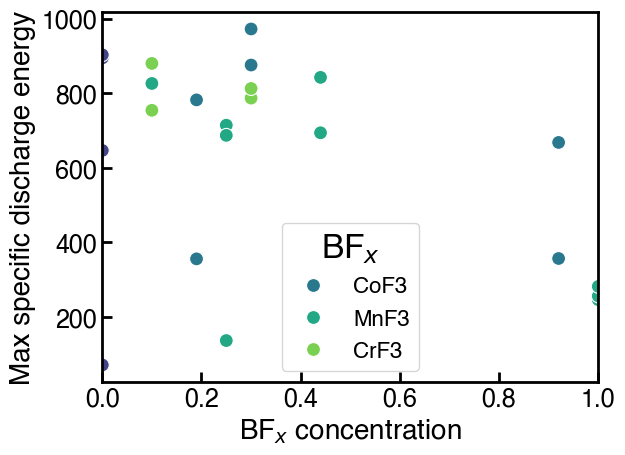

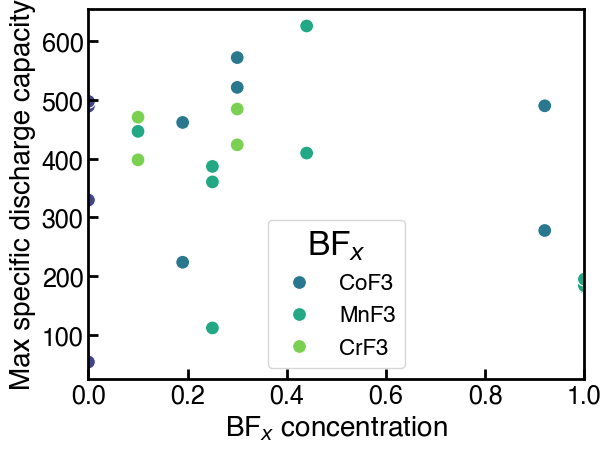

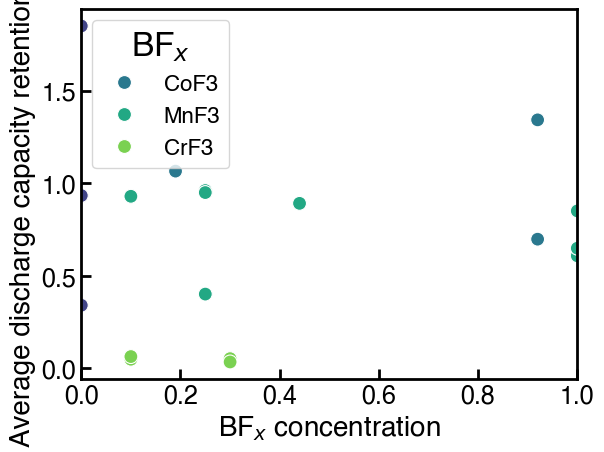

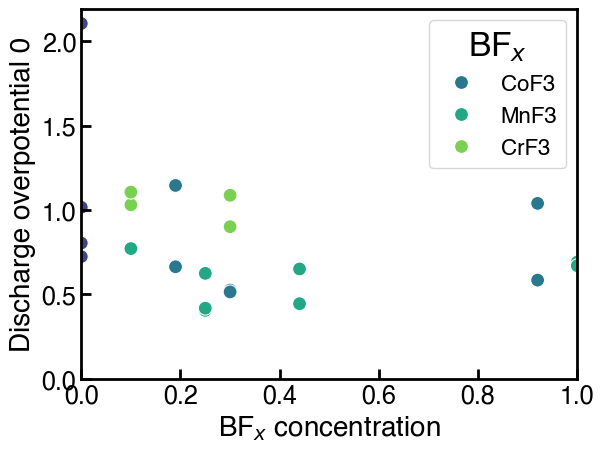

In [84]:
afx_mask = cells_df['AFx'] == 'FeF3'
cells_df['BFx'] = cells_df['BFx'].fillna('') # Allows for rows without BFx filled in to be plotted

sn.scatterplot(data=cells_df[afx_mask], x='BFx Ratio', y='Max specific discharge energy', hue='BFx', palette='viridis')
plt.legend(title='BF$_x$')
plt.xlim(0,1)
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=cells_df[afx_mask], x='BFx Ratio', y='Max specific discharge capacity', hue='BFx', palette='viridis')
plt.legend(title='BF$_x$')
plt.xlim(0,1)
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=cells_df[afx_mask], x='BFx Ratio', y='Average discharge capacity retention 0,5', hue='BFx', palette='viridis')
plt.legend(title='BF$_x$')
plt.xlim(0,1)
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=cells_df[afx_mask], x='BFx Ratio', y='Discharge overpotential 0', hue='BFx', palette='viridis')
plt.legend(title='BF$_x$')
plt.xlim(0,1)
plt.ylim(bottom=0)
plt.xlabel('BF$_x$ concentration')
plt.show()

['../../../PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.csv', '../../../PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_54318/3172772513.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.7453215999999998


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Specific Capacity / mAh/g cathode', ylabel='Voltage / V'>)

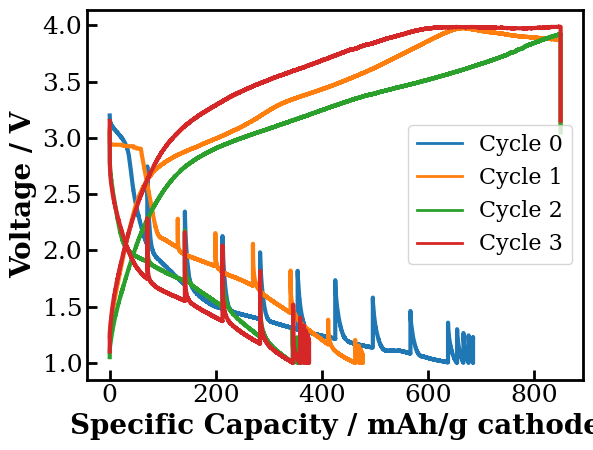

In [86]:
dir_name = os.path.join(id_to_path('CC052B'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < 4.39]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

# cc054a_full_cap = df_sum['Specific Discharge Capacity']
# cc054a_energy = df_sum['Specific Discharge Energy']

ec.charge_discharge_plot(df, cycles=[0,1,2,3], norm='mass')
# ec.multi_dqdv_plot(df_no_CV, cycles=[0,1,2], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

['../../../PROPEL-1K/Li-Fe0p9Cr0p1F3-25CB-C1-CCPP/250116-CC060A-C20-1V-4p5V_CV/outputs/250116-CC060A-C20-1V-4p5V_CV.csv', '../../../PROPEL-1K/Li-Fe0p9Cr0p1F3-25CB-C1-CCPP/250116-CC060A-C20-1V-4p5V_CV/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_54318/2671106077.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.03044476


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

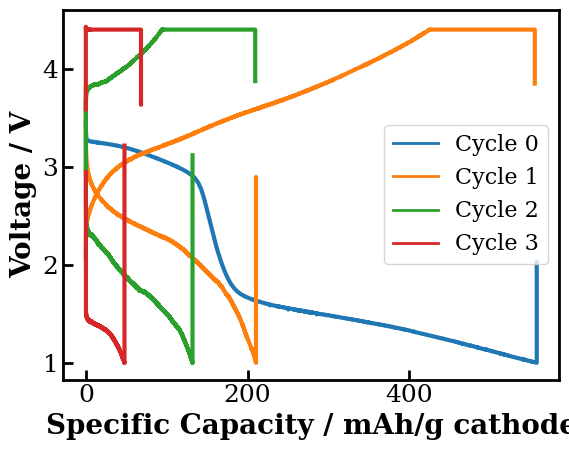

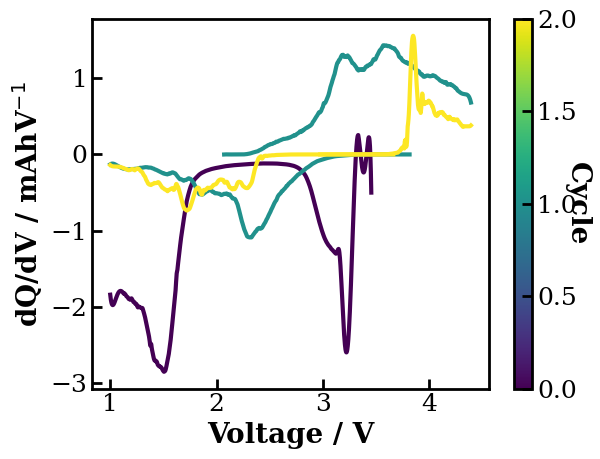

In [87]:
dir_name = os.path.join(id_to_path('CC060A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < 4.39]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

# cc054a_full_cap = df_sum['Specific Discharge Capacity']
# cc054a_energy = df_sum['Specific Discharge Energy']

ec.charge_discharge_plot(df, cycles=[0,1,2,3], norm='mass')
ec.multi_dqdv_plot(df_no_CV, cycles=[0,1,2], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

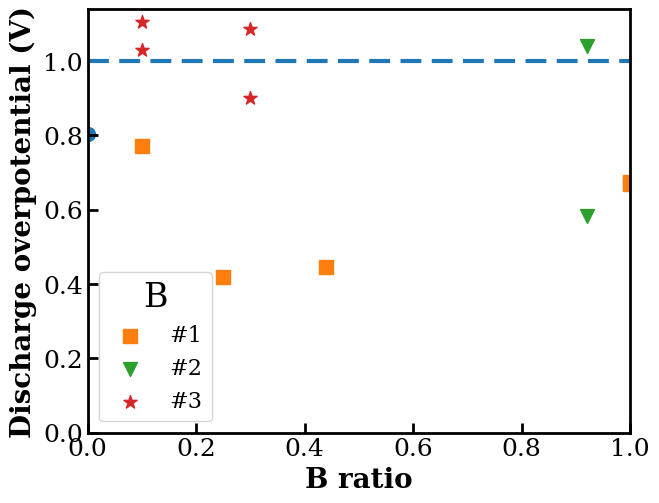

In [22]:
plt.subplots(figsize=(7,5.5))
plt.scatter([0], [0.804], label='_')
plt.scatter([0.1, 0.25, 0.44, 1, 1], [0.771, 0.418, 0.445, 0.673, 0.670], marker='s', label='#1')
plt.scatter([0.92, 0.92], [1.039, 0.584], marker='v', label='#2')
plt.scatter([0.1, 0.1, 0.3, 0.3], [1.030, 1.105, 1.087, 0.901], marker='*', label='#3')

plt.legend(title='B')
plt.xlim(0,1)
plt.ylim(bottom=0)
plt.xlabel('B ratio')
plt.ylabel('Discharge overpotential (V)')
plt.axhline(1, linestyle='--')